<a href="https://colab.research.google.com/github/juangui96/DS-_-Boot-Camp/blob/main/Proyecto_Avance_VII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SUPER STORE - PREDICCION Y ANALISIS
Objetivo: Predecir cuales seran las ventas en los proximos periodos de tiempo de los clientes, zonas y categoria de productos que se tiene en el
momento partiendo de una definicion de estado actual de las ventas.

## IMPORTAR LIBRERIAS

In [2]:
#importar librerias
import pandas as pd
import numpy as np

In [3]:
! pip install chart_studio
import plotly.express as px
import plotly.graph_objects as go
import chart_studio.plotly as py
import matplotlib.pyplot as plt
import seaborn as sns
#ignorar warning
import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.5 MB/s eta 0:00:00


##CARGAR DATOS

In [4]:
url = 'https://raw.githubusercontent.com/juangui96/DS-_-Boot-Camp/main/Proyecto_Final/Actividad_1/super%20Store%20.csv'
ss = pd.read_csv(url, sep = ';')
ss['Order Date']=pd.to_datetime(ss['Order Date'],format='%d/%m/%Y')
ss['Ship Date']=pd.to_datetime(ss['Ship Date'],format='%d/%m/%Y')
ss['Order Month']=ss['Order Date'].dt.month
ss['Order Year']=ss['Order Date'].dt.year

In [5]:
  ss.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Month,Order Year
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,11,2017
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,11,2017


##EDA
A diferencia de entregas anteriores, esta ez los NA no se llenaran con 0 o se eliminara la columna, se utilizaran diferentes metodos para rellenarlos. Sin embargo, teniendo en cuenta el contexto del analisis, y sabiendo que la totalidad de datos faltantes es muy baja se recomienda eliminarlos.

*   NA
*   Se revisan vacios
*   Se cambia el formato de las ventas (dado el separador que traer por defecto el DF)







In [6]:
#Conversion en millones de Ventas (Sales)
ss['Sales2']=ss['Sales'].str.replace('.','').astype('float')/1000000
ss.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Month,Order Year,Sales2
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,11,2017,0.026196
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,11,2017,0.073194


In [7]:
#Verificacion de nulos
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9799 entries, 0 to 9798
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9799 non-null   int64         
 1   Order ID       9799 non-null   object        
 2   Order Date     9799 non-null   datetime64[ns]
 3   Ship Date      9799 non-null   datetime64[ns]
 4   Ship Mode      9799 non-null   object        
 5   Customer ID    9799 non-null   object        
 6   Customer Name  9799 non-null   object        
 7   Segment        9799 non-null   object        
 8   Country        9799 non-null   object        
 9   City           9799 non-null   object        
 10  State          9799 non-null   object        
 11  Postal Code    9788 non-null   float64       
 12  Region         9799 non-null   object        
 13  Product ID     9799 non-null   object        
 14  Category       9799 non-null   object        
 15  Sub-Category   9799 n

In [8]:
#Verificar NaN: Se evidencian 11 postal code en blanco los cuales deben ser eliminados y 5 registros de ventas
ss.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             5
Order Month       0
Order Year        0
Sales2            5
dtype: int64

In [9]:
ss[ss['Sales2'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Month,Order Year,Sales2
429,431,US-2017-123750,2017-04-15,2017-04-21,Standard Class,RB-19795,Ross Baird,Home Office,United States,Gastonia,...,28052.0,South,TEC-AC-10004659,Technology,Accessories,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,NaN,4,2017,NaN
430,432,US-2017-123750,2017-04-15,2017-04-21,Standard Class,RB-19795,Ross Baird,Home Office,United States,Gastonia,...,28052.0,South,TEC-AC-10004659,Technology,Accessories,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,NaN,4,2017,NaN
1405,1407,US-2015-118486,2015-04-06,2015-04-08,First Class,SD-20485,Shirley Daniels,Home Office,United States,Philadelphia,...,19143.0,East,TEC-AC-10004659,Technology,Accessories,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,NaN,4,2015,NaN
1968,1970,CA-2018-117485,2018-09-23,2018-09-29,Standard Class,BD-11320,Bill Donatelli,Consumer,United States,Tulsa,...,74133.0,Central,TEC-AC-10004659,Technology,Accessories,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,NaN,9,2018,NaN
1970,1972,CA-2018-140242,2018-05-06,2018-05-11,Standard Class,ML-17755,Max Ludwig,Home Office,United States,Chicago,...,60623.0,Central,TEC-AC-10004659,Technology,Accessories,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,NaN,5,2018,NaN


#1 METODO : REMPLAZAR NULOS POR MEDIA/MEDIANA
El primer metodo para tratamiento de nulos, se centra en remplazar esos valoes por la media general , sin embargo solo el 16% de los datos esta por encima de este valor, por lo cual, no se considera adecuado este remplazo. Adicionalmente se encuentar que le rango en el que varian los datos es bastante amplio. Por lo cual, se analiza la mediana, y se opta por cambiar las 5 ventas faltantes por este valor.

In [10]:
promedio_ventas = ss['Sales2'].mean()
ss['Validacion_media'] = 0
for i in range(len(ss['Sales2'])):
  if ss['Sales2'][i]<= promedio_ventas:
    ss['Validacion_media'][i]='Menor a media'
  else:
    ss['Validacion_media'][i]='Mayor a media'

In [11]:
ss.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Month,Order Year,Sales2,Validacion_media
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,11,2017,0.026196,Menor a media
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,11,2017,0.073194,Menor a media


In [12]:
ss.groupby(['Validacion_media'])['Validacion_media'].value_counts()

Validacion_media
Mayor a media    1597
Menor a media    8202
Name: count, dtype: int64

Se evidencia que muchos valores estan por debajo de la media por lo cual, se opota por remplazar los datos faltantes por la mediana

In [13]:
print(ss['Sales2'].median(),ss['Sales2'].mean())

0.011096499999999999 0.11367810812742495


In [14]:
media_ventas = ss['Sales2'].median()
ss['validacion_mediana']=0
for i in range(len(ss['Sales2'])):
  if ss['Sales2'][i]<= media_ventas:
    ss['validacion_mediana'][i]='Menor a mediana'
  else:
    ss['validacion_mediana'][i]='Mayor a mediana'


In [15]:
ss.groupby(['validacion_mediana'])['validacion_mediana'].value_counts()

validacion_mediana
Mayor a mediana    4902
Menor a mediana    4897
Name: count, dtype: int64

In [16]:
#remplazando faltantes por el valor de la mediana
ss1 = ss.copy()
ss1['Sales2_mediana']=ss1['Sales2'].fillna(media_ventas)

In [17]:
ss1.isnull().sum()

Row ID                 0
Order ID               0
Order Date             0
Ship Date              0
Ship Mode              0
Customer ID            0
Customer Name          0
Segment                0
Country                0
City                   0
State                  0
Postal Code           11
Region                 0
Product ID             0
Category               0
Sub-Category           0
Product Name           0
Sales                  5
Order Month            0
Order Year             0
Sales2                 5
Validacion_media       0
validacion_mediana     0
Sales2_mediana         0
dtype: int64

## 3. METODO DE IMPUTACION DE FALTANTES KNN
Como se puede apreciar, al imputar la variable mediante este metodo sin usar one hot encoding el valor de la media es el que se atribuye a los valores faltantes. Sin embargo, ingresar en el modelo variables como: segmento, region y categoria de producto se obtienen resultados diferentes. EL metodo se aplica inicialmente con k = 5 . Posteriormente se realiza una iteracion de esta aproximacion con k =  2 hasta 10, se encuentra que el punto de "inflexion" de los valores corresponde a k = 5


In [18]:
ss2 = ss.copy()

In [19]:
ss.columns.values

array(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City',
       'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Order Month',
       'Order Year', 'Sales2', 'Validacion_media', 'validacion_mediana'],
      dtype=object)

In [20]:
#0 Traer librerias
from sklearn.impute import KNNImputer
#1  Crear el modelo de imputacion de faltantes
imputer = KNNImputer(n_neighbors=5, weights="distance")

#2 Convertir la columna en un dataframe de 2D , SIEMPRE se requiere que tenga al menos dos dimensiones para realizar la imputacion. En este caso se transforma mediante el doble corchete para no usar funcion DF
sales_imputed = imputer.fit_transform(ss2[['Sales2']])

#3 Convertir los valores anteriores en un arreglo de 1D para remplazar los faltantes
ss2['Sales2_knn_faltantes'] =sales_imputed.ravel()

ss2.isnull().sum()

Row ID                   0
Order ID                 0
Order Date               0
Ship Date                0
Ship Mode                0
Customer ID              0
Customer Name            0
Segment                  0
Country                  0
City                     0
State                    0
Postal Code             11
Region                   0
Product ID               0
Category                 0
Sub-Category             0
Product Name             0
Sales                    5
Order Month              0
Order Year               0
Sales2                   5
Validacion_media         0
validacion_mediana       0
Sales2_knn_faltantes     0
dtype: int64

In [21]:
ss2[ss2['Sales2'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Order Month,Order Year,Sales2,Validacion_media,validacion_mediana,Sales2_knn_faltantes
429,431,US-2017-123750,2017-04-15,2017-04-21,Standard Class,RB-19795,Ross Baird,Home Office,United States,Gastonia,...,Technology,Accessories,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,NaN,4,2017,NaN,Mayor a media,Mayor a mediana,0.113678
430,432,US-2017-123750,2017-04-15,2017-04-21,Standard Class,RB-19795,Ross Baird,Home Office,United States,Gastonia,...,Technology,Accessories,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,NaN,4,2017,NaN,Mayor a media,Mayor a mediana,0.113678
1405,1407,US-2015-118486,2015-04-06,2015-04-08,First Class,SD-20485,Shirley Daniels,Home Office,United States,Philadelphia,...,Technology,Accessories,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,NaN,4,2015,NaN,Mayor a media,Mayor a mediana,0.113678
1968,1970,CA-2018-117485,2018-09-23,2018-09-29,Standard Class,BD-11320,Bill Donatelli,Consumer,United States,Tulsa,...,Technology,Accessories,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,NaN,9,2018,NaN,Mayor a media,Mayor a mediana,0.113678
1970,1972,CA-2018-140242,2018-05-06,2018-05-11,Standard Class,ML-17755,Max Ludwig,Home Office,United States,Chicago,...,Technology,Accessories,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,NaN,5,2018,NaN,Mayor a media,Mayor a mediana,0.113678


In [22]:
ss1[ss1['Sales2'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Order Month,Order Year,Sales2,Validacion_media,validacion_mediana,Sales2_mediana
429,431,US-2017-123750,2017-04-15,2017-04-21,Standard Class,RB-19795,Ross Baird,Home Office,United States,Gastonia,...,Technology,Accessories,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,NaN,4,2017,NaN,Mayor a media,Mayor a mediana,0.011096
430,432,US-2017-123750,2017-04-15,2017-04-21,Standard Class,RB-19795,Ross Baird,Home Office,United States,Gastonia,...,Technology,Accessories,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,NaN,4,2017,NaN,Mayor a media,Mayor a mediana,0.011096
1405,1407,US-2015-118486,2015-04-06,2015-04-08,First Class,SD-20485,Shirley Daniels,Home Office,United States,Philadelphia,...,Technology,Accessories,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,NaN,4,2015,NaN,Mayor a media,Mayor a mediana,0.011096
1968,1970,CA-2018-117485,2018-09-23,2018-09-29,Standard Class,BD-11320,Bill Donatelli,Consumer,United States,Tulsa,...,Technology,Accessories,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,NaN,9,2018,NaN,Mayor a media,Mayor a mediana,0.011096
1970,1972,CA-2018-140242,2018-05-06,2018-05-11,Standard Class,ML-17755,Max Ludwig,Home Office,United States,Chicago,...,Technology,Accessories,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,NaN,5,2018,NaN,Mayor a media,Mayor a mediana,0.011096


In [23]:
#ONE HOT ENCODING
ss_prueba = ss[['Segment','Region','Category','Sales2']]
ss_prueba

,Segment,Region,Category,Sales2
0,Consumer,South,Furniture,0.026196
1,Consumer,South,Furniture,0.073194
2,Corporate,West,Office Supplies,0.001462
3,Consumer,South,Furniture,9.575775
4,Consumer,South,Office Supplies,0.022368
...,...,...,...,...
9794,Corporate,Central,Office Supplies,0.003798
9795,Corporate,East,Office Supplies,0.010368
9796,Corporate,East,Technology,0.235188
9797,Corporate,East,Technology,0.026376


In [24]:
ss_prueba1 = pd.get_dummies(ss_prueba[['Segment','Region','Category']])
ss_prueba2 = pd.merge(ss_prueba1,ss_prueba['Sales2'], left_index=True, right_index=True, how='left')

In [25]:
ss_prueba2[ss_prueba2['Sales2'].isnull()]

,Segment_Consumer,Segment_Corporate,Segment_Home Office,Region_Central,Region_East,Region_South,Region_West,Category_Furniture,Category_Office Supplies,Category_Technology,Sales2
429,False,False,True,False,False,True,False,False,False,True,NaN
430,False,False,True,False,False,True,False,False,False,True,NaN
1405,False,False,True,False,True,False,False,False,False,True,NaN
1968,True,False,False,True,False,False,False,False,False,True,NaN
1970,False,False,True,True,False,False,False,False,False,True,NaN


In [26]:
#0 Traer librerias
from sklearn.impute import KNNImputer
#1  Crear el modelo de imputacion de faltantes
imputer = KNNImputer(n_neighbors=5, weights="distance")

In [27]:
#imputar los valores mediante la funcion definida anteriormente
sales_imputed = imputer.fit_transform(ss_prueba2)
#convertir en df el resultado y ponerle el nombre de las columnas
preuba_kmm = pd.DataFrame(sales_imputed,columns=ss_prueba2.columns.values)
#filtrar los que tienen sales2 en blanco
preuba_kmm = preuba_kmm[ss_prueba['Sales2'].isnull()].reset_index()
preuba_kmm

,index,Segment_Consumer,Segment_Corporate,Segment_Home Office,Region_Central,Region_East,Region_South,Region_West,Category_Furniture,Category_Office Supplies,Category_Technology,Sales2
0,429,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.593205
1,430,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.593205
2,1405,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.111817
3,1968,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.974599
4,1970,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.040551


Text(0.5, 1.0, 'k=5')

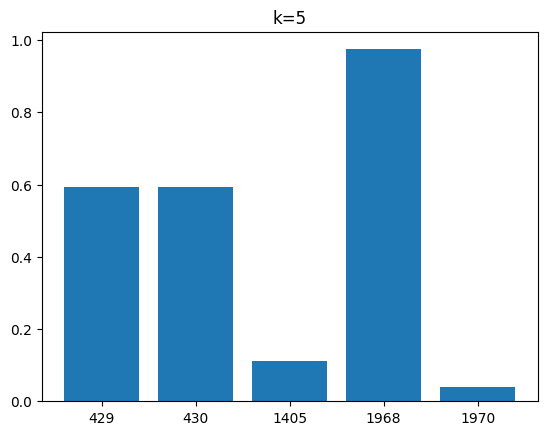

In [28]:
plt.bar(preuba_kmm['index'].astype('string'),preuba_kmm['Sales2'])
plt.title("k=5")


In [29]:
compracionk  = pd.DataFrame()
comparacion_final = pd.DataFrame()
for i in range(1,11):
  imputer = KNNImputer(n_neighbors=i, weights="distance")
  sales_imputed = imputer.fit_transform(ss_prueba2)
  preuba_kmm = pd.DataFrame(sales_imputed,columns=ss_prueba2.columns.values)
  compracionk = preuba_kmm[ss_prueba2['Sales2'].isnull()]
  compracionk['k'] = i
  comparacion_final = pd.concat([compracionk,comparacion_final],axis=0)


In [30]:
comparacion_final

,Segment_Consumer,Segment_Corporate,Segment_Home Office,Region_Central,Region_East,Region_South,Region_West,Category_Furniture,Category_Office Supplies,Category_Technology,Sales2,k
429,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.339148,10
430,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.339148,10
1405,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.185721,10
1968,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.541991,10
1970,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.061032,10
429,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.352478,9
430,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.352478,9
1405,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.197725,9
1968,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.593148,9
1970,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.062814,9


In [31]:
px.bar(comparacion_final.reset_index(),
       y='Sales2',
         color='k')

In [32]:
valores_nan = comparacion_final[comparacion_final['k']==3]['Sales2'].reset_index()

In [33]:
valores_nan

,index,Sales2
0,429,0.219513
1,430,0.219513
2,1405,0.095526
3,1968,2.752148
4,1970,0.117613


In [34]:
ss_prueba_sin_na = ss.copy().reset_index()
ss_prueba_sin_na

,index,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Order Month,Order Year,Sales2,Validacion_media,validacion_mediana
0,0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,11,2017,0.026196,Menor a media,Mayor a mediana
1,1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,11,2017,0.073194,Menor a media,Mayor a mediana
2,2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,6,2017,0.001462,Menor a media,Menor a mediana
3,3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,9.575.775,10,2016,9.575775,Mayor a media,Mayor a mediana
4,4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,10,2016,0.022368,Menor a media,Mayor a mediana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9794,9794,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,...,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798,5,2017,0.003798,Menor a media,Menor a mediana
9795,9795,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,...,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368,1,2016,0.010368,Menor a media,Menor a mediana
9796,9796,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,...,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188,1,2016,0.235188,Mayor a media,Mayor a mediana
9797,9797,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,...,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376,1,2016,0.026376,Menor a media,Mayor a mediana


In [35]:
for i in valores_nan['index']:
  for j in (ss_prueba_sin_na['index']):
    if i == j:
     (valores_nan[valores_nan['index']==j]['Sales2'])=(ss_prueba_sin_na[ss_prueba_sin_na['index']==i]['Sales2'])
    else:
      pass

In [36]:
ss_prueba_sin_na1 = pd.DataFrame()
ss_prueba_sin_na1 = pd.merge(ss_prueba_sin_na,valores_nan,how='left',left_on='index',right_on='index')

In [37]:
ss_prueba_sin_na1['Sales2_final']= ""
for i in range(len(ss_prueba_sin_na1['index'])):
  if ss_prueba_sin_na1['Sales2_x'].isnull().iloc[i]:
    ss_prueba_sin_na1['Sales2_final'][i]=ss_prueba_sin_na1['Sales2_y'][i]
  else:
    ss_prueba_sin_na1['Sales2_final'][i]=ss_prueba_sin_na1['Sales2_x'][i]

In [38]:
ss_prueba_sin_na1[ss_prueba_sin_na1['index']==429]

,index,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Sub-Category,Product Name,Sales,Order Month,Order Year,Sales2_x,Validacion_media,validacion_mediana,Sales2_y,Sales2_final
429,429,431,US-2017-123750,2017-04-15,2017-04-21,Standard Class,RB-19795,Ross Baird,Home Office,United States,...,Accessories,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,NaN,4,2017,NaN,Mayor a media,Mayor a mediana,0.219513,0.219513


##4. Deteccion de Outliers
Lo primero que se puede ver mediante un boxplot es que hay una cantidad significativa de outliers, esto puede deberse al supuesto realizado en cuanto a la unidad de las ventas reportadas.

In [39]:
#boxplot sin eliminacion de outliers
px.box(ss,y='Sales2')

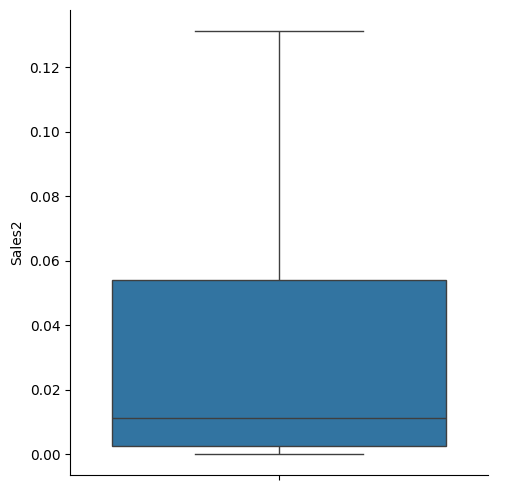

In [40]:
#boxplot sin outliers
a = sns.catplot(kind='box',showfliers=False,y='Sales2',data=ss)
a

### Isolation forest

In [41]:
from sklearn.ensemble import IsolationForest


In [42]:
iso_ss1 = IsolationForest(contamination=0.1)

In [43]:
ss_outliers = ss.copy()

In [44]:
ss_outliers['Sales2']=ss_outliers['Sales2'].replace(np.NaN,0)
ss_outliers2 = pd.DataFrame(ss_outliers['Sales2'])

In [45]:
ss_outliers2

,Sales2
0,0.026196
1,0.073194
2,0.001462
3,9.575775
4,0.022368
...,...
9794,0.003798
9795,0.010368
9796,0.235188
9797,0.026376


In [46]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=15,algorithm='auto',metric='minkowski')
yhat = pd.DataFrame(lof.fit_predict(ss_outliers2)).rename(columns={0:'Outlier'})
yhat

,Outlier
0,1
1,1
2,1
3,-1
4,1
...,...
9794,1
9795,1
9796,-1
9797,1


In [48]:
ss_outliers3 = pd.concat([ss_outliers,yhat],axis=1)

In [49]:
ss_outliers3['Outlier'].value_counts()

Outlier
 1    9030
-1     769
Name: count, dtype: int64

In [50]:
ss_outliers_consolidado= pd.DataFrame(ss_outliers3['Outlier'].value_counts()).reset_index()
ss_outliers_consolidado

,Outlier,count
0,1,9030
1,-1,769


In [65]:
#Declarar DF a utilizar
ss_outliers_consolidado = pd.DataFrame()
ss_outliers_final= pd.DataFrame()
#Ciclo for para iterar desde 2 hasta cluster n
for cluster in range(1,30):
  #definir la funcion del LOF a usar
  lof = LocalOutlierFactor(n_neighbors=cluster,algorithm='auto',metric='minkowski')
  #aplicar la funcion anterior sobre la variable a analizar (debe estar en formato DF con indice) y se le asigna el nombre a la ultima columna
  yhat = pd.DataFrame(lof.fit_predict(ss_outliers2)).rename(columns={0:'Outlier'})
  #concater lo obtenido con el df a analizar donde se encuentra toda la info (ss_outliers)
  ss_outliers3 = pd.concat([ss_outliers,yhat],axis=1)
  #realiza el conteo de cuantos outiliers hay
  ss_outliers_consolidado= pd.DataFrame(ss_outliers3['Outlier'].value_counts()).reset_index()
  #crea una columna con el # de cluster
  ss_outliers_consolidado['cluster'] = cluster
  #consolida el resultado de cada iteracion en un df final
  ss_outliers_final = pd.concat([ss_outliers_consolidado,ss_outliers_final],axis=0)


In [66]:
ss_outliers_final[ss_outliers_final['Outlier']==1]


,Outlier,count,cluster
0,1,9371,29
0,1,9346,28
0,1,9341,27
0,1,9337,26
0,1,9347,25
0,1,9350,24
0,1,9358,23
0,1,9349,22
0,1,9283,21
0,1,9242,20


In [67]:
#el n se encuentra donde la grafica tiende a estabilizarse, ademas se analiza el % de outliers vs el total de la muestra
px.line(ss_outliers_final,x='cluster',y='count',color='Outlier')

In [68]:
ss_sin_outliers = ss_prueba_sin_na1.copy()
#definir la funcion del LOF a usar
lof = LocalOutlierFactor(n_neighbors=22,algorithm='auto',metric='minkowski')
#aplicar la funcion anterior sobre la variable a analizar (debe estar en formato DF con indice) y se le asigna el nombre a la ultima columna
yhat = lof.fit_predict(pd.DataFrame(ss_sin_outliers['Sales2_final']))
#convertir salida en DF para concatenar
yhat = pd.DataFrame(yhat)
#concater lo obtenido con el df a analizar donde se encuentra toda la info (ss_outliers)
ss_sin_outliers = pd.concat([ss_sin_outliers,yhat],axis=1)

In [73]:
ss_sin_outliers_final = ss_sin_outliers[ss_sin_outliers[0]==1].drop(columns='index')

In [74]:
ss_sin_outliers_final

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Order Month,Order Year,Sales2_x,Validacion_media,validacion_mediana,Sales2_y,Sales2_final,0
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.96,11,2017,0.026196,Menor a media,Mayor a mediana,NaN,0.026196,1
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,11,2017,0.073194,Menor a media,Mayor a mediana,NaN,0.073194,1
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.62,6,2017,0.001462,Menor a media,Menor a mediana,NaN,0.001462,1
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.368,10,2016,0.022368,Menor a media,Mayor a mediana,NaN,0.022368,1
5,6,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Eldon Expressions Wood and Plastic Desk Access...,48.86,6,2015,0.004886,Menor a media,Menor a mediana,NaN,0.004886,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9792,9794,CA-2015-127166,2015-05-21,2015-05-23,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,...,"Adams Telephone Message Books, 5 1/4” x 11”",4.832,5,2015,0.004832,Menor a media,Menor a mediana,NaN,0.004832,1
9793,9795,CA-2015-127166,2015-05-21,2015-05-23,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,...,Ibico Plastic Spiral Binding Combs,18.24,5,2015,0.001824,Menor a media,Menor a mediana,NaN,0.001824,1
9794,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,...,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798,5,2017,0.003798,Menor a media,Menor a mediana,NaN,0.003798,1
9795,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,"BIC Brite Liner Highlighters, Chisel Tip",10.368,1,2016,0.010368,Menor a media,Menor a mediana,NaN,0.010368,1
